# QSAR Machine Learning Methods

In [1]:
# Imported Modules/Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Baseline Method

### Linear Regression

In [2]:
np.random.seed(42)

In [33]:
# Load dataset and define X and y
df = pd.read_excel("/Users/ariannadaniel/Library/CloudStorage/Box-Box/antifungal_ML_2025/112_curated_patent_drugs_final_final.xlsx") # location relative to my personal location


In [34]:
df.columns

Index(['name', 'SMILE', 'IC50 (uM)', 'pIC50', 'source', 'Compound_CID',
       'Molecular_Weight', 'Molecular_Formula', 'Polar_Area', 'Complexity',
       ...
       'WTPT-3', 'WTPT-4', 'WTPT-5', 'WPATH', 'WPOL', 'XLogP', 'Zagreb',
       'SMILES_canon', 'Morgan_FP', 'MACCS_FP'],
      dtype='object', length=1573)

In [38]:
df

name  \
0                                             10058-F4   
1                                      AC-93253 iodide   
2                                            AS 604850   
3                                       Amphotericin B   
4                                            Auranofin   
..                                                 ...   
107  O-6-amino-6-deoxy-L-glycero-D-galacto-heptopyr...   
108                                          Olivacine   
109                                      Ruthenium Red   
110                                  Staurosporine HCl   
111                                    Trifluoperazine   

                                                 SMILE IC50 (uM)     pIC50  \
0                  CCC1=CC=C(C=C1)/C=C/2\C(=O)NC(=S)S2      3.11  5.507240   
1    CC[N+]1=C(SC2=CC=CC=C21)/C=C/C=C/3\C(C4=CC=CC=...     2.649  5.576918   
2         C1=CC2=C(C=C1/C=C\3/C(=O)NC(=O)S3)OC(O2)(F)F    5.6995  5.244163   
3    C[C@H]1/C=C/C=C/C=C/C=C/C=C/C=C/C=C/[C@@H](C[C...      0.04  7.397940   
4    CCP(CC)CC.CC(=O)OC[C@@H]1[C@H]([C@@H]([C@H]([C...      9.54  5.020452   
..                                                 ...       ...       ...   
107  CN[C@H]1C[C@H]([C@@H]([C@H]([C@@H]1O)O[C@H]2[C...       NaN       NaN   
108              CC1=C2C=CNC(=C2C=C3C1=NC4=CC=CC=C43)C       NaN       NaN   
109  N.N.N.N.N.N.N.N.N.N.N.N.N.N.[O-2].[O-2].[Cl-]....       NaN       NaN   
110  CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...       NaN       NaN   
111  CN1CCN(CC1)CCCN2C3=CC=CC=C3SC4=C2C=C(C=C4)C(F)...       NaN       NaN   

      source  Compound_CID  Molecular_Weight Molecular_Formula  Polar_Area  \
0    curated       1271002            249.40        C12H11NOS2        86.5   
1    curated      16078948            488.40        C23H25IN2S        35.4   
2    curated       5287855            285.23       C11H5F2NO4S        89.9   
3    curated       5280965            924.10        C47H73NO17       320.0   
4    curated      16667669            678.50      C20H34AuO9PS       115.0   
..       ...           ...               ...               ...         ...   
107   patent      20054887            527.50       C20H37N3O13       272.0   
108   patent         96364            246.31          C17H14N2        24.4   
109   patent     117587625            786.30    Cl6H42N14O2Ru3        16.0   
110   patent          5279            466.50        C28H26N4O3        69.5   
111   patent          5566            407.50       C21H24F3N3S        35.0   

     Complexity  ...     WTPT-3     WTPT-4     WTPT-5  WPATH  WPOL  XLogP  \
0           330  ...  11.020570   2.530654   2.957912    475    20  2.345   
1           567  ...   9.933874   0.000000   6.770461   1722    46  4.722   
2           468  ...  22.064400  11.135515   2.959513    724    26  1.298   
3          1670  ...  47.303816  44.799004   2.504812  22044   103  2.068   
4           532  ...  27.170229  24.595884   0.000000   1281    34 -0.134   
..          ...  ...        ...        ...        ...    ...   ...    ...   
107         756  ...  43.883323  36.093847   7.789476   3672    73 -5.261   
108         599  ...   6.210438   0.000000   6.210438    616    35  1.890   
109           0  ...   1.000000   0.000000   1.000000      0     0  0.000   
110         901  ...  21.924490   8.616324  13.308166   2737    85  2.401   
111         510  ...  20.600098   0.000000  10.234360   2075    46  2.972   

     Zagreb                                       SMILES_canon  \
0        80                      CCc1ccc(/C=C2/SC(=S)NC2=O)cc1   
1       144  CC[n+]1c(/C=C/C=C2/N(C)c3ccccc3C2(C)C)sc2ccccc...   
2       106           O=C1NC(=O)/C(=C/c2ccc3c(c2)OC(F)(F)O3)S1   
3       318  C[C@@H]1[C@H](O)[C@@H](C)/C=C/C=C/C=C/C=C/C=C/...   
4       114  CC(=O)OC[C@H]1O[C@@H]([S-])[C@H](OC(C)=O)[C@@H...   
..      ...                                                ...   
107     198  CN[C@H]1C[C@@H](N)[C@H](O)[C@@H](O[C@@H]2O[C@H...   
108     110               

In [66]:
#drop rows with missing data in pIC50
df.drop(index=109) # ruthenium red, this row will throw infinity errors when standardizing
df_clean = df.dropna(subset=["pIC50"])

df_clean2 = df_clean.drop(columns=["name", "SMILE", "IC50 (uM)", "source", "Compound_CID", "Molecular_Formula", "SMILES_canon", "Morgan_FP", "MACCS_FP"])
df_clean2

pIC50  Molecular_Weight  Polar_Area  Complexity  xlogp  heavycnt  \
0   5.507240            249.40      86.500         330    3.6        16   
1   5.576918            488.40      35.400         567    NaN        27   
2   5.244163            285.23      89.900         468    2.8        19   
3   7.397940            924.10     320.000        1670    0.0        65   
4   5.020452            678.50     115.000         532    NaN        32   
..       ...               ...         ...         ...    ...       ...   
73  4.301030            466.70      58.600         725    3.6        34   
74  5.101824            360.20      64.099         427    4.1        24   
75  6.342944            349.31      76.700         448    1.5        25   
76  5.243668            367.90      20.300         412    NaN        26   
78  5.721475            242.27      43.400         445    2.2        18   

    hbonddonor  hbondacc  Rotatable_Bonds   exactmass  ...        AMW  \
0            1         3                2  249.028214  ...   9.223267   
1            0         3                3  488.078308  ...   7.081840   
2            1         7                1  284.990723  ...  11.874614   
3           12        18                3  923.487854  ...   6.691941   
4            0        10               12  678.132690  ...   8.443604   
..         ...       ...              ...         ...  ...        ...   
73           1         4                9  466.319550  ...   6.135783   
74           1         4                4  359.022827  ...  10.257795   
75           1         8                5  349.115051  ...   8.951668   
76           1         2                7  367.170288  ...   6.623872   
78           0         3                0  242.094299  ...   7.565447   

        WTPT-1    WTPT-2     WTPT-3     WTPT-4     WTPT-5  WPATH  WPOL  XLogP  \
0    32.108934  2.006808  11.020570   2.530654   2.957912    475    20  2.345   
1    53.508806  2.058031   9.933874   0.000000   6.770461   1722    46  4.722   
2    38.642529  2.033817  22.064400  11.135515   2.959513    724    26  1.298   
3   128.426879  1.975798  47.303816  44.799004   2.504812  22044   103  2.068   
4    46.546023  1.939418  27.170229  24.595884   0.000000   1281    34 -0.134   
..         ...       ...        ...        ...        ...    ...   ...    ...   
73   70.365398  2.069571  14.311986   7.855378   6.456607   4206    59  4.510   
74   48.894910  2.037288  19.929224   5.688157   9.151296   1547    34  1.595   
75   50.334469  2.013379  25.560543   2.584059  15.378807   1359    41 -1.176   
76   50.937432  2.037497   5.940905   2.566319   3.374586   1676    36  4.044   
78   36.802248  2.044569   8.204023   8.204023   0.000000    522    33  1.768   

    Zagreb  
0       80  
1      144  
2      106  
3      318  
4      114  
..     ...  
73     186  
74     122  
75     132  
76     126  
78     102  

[65 rows x 1564 columns]

In [92]:
!pwd

/Users/ariannadaniel/Desktop/PhD_projects/COCCI_DRUGS/qsar-modeling/notebooks


In [93]:
df_clean2.to_csv("/Users/ariannadaniel/Desktop/PhD_projects/COCCI_DRUGS/qsar-modeling/data/IC50_only_qsar_descriptors_full.csv", index=False)

In [67]:
#drop any columns with missing data
df2 = df_clean2.dropna(axis =1).reset_index(drop=True)
df2.columns

Index(['pIC50', 'Molecular_Weight', 'Polar_Area', 'Complexity', 'heavycnt',
       'hbonddonor', 'hbondacc', 'Rotatable_Bonds', 'exactmass',
       'monoisotopicmass',
       ...
       'AMW', 'WTPT-1', 'WTPT-2', 'WTPT-3', 'WTPT-4', 'WTPT-5', 'WPATH',
       'WPOL', 'XLogP', 'Zagreb'],
      dtype='object', length=1562)

In [68]:
df2.shape

(65, 1562)

In [70]:
#add in the new dataset with more compounds. Will have an additional 15 compounds (80 total)
X_new = df2 # our feature matrix (descriptors)

X_new = df2.drop(columns=["pIC50"])

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X_new) #everything except pIC50
y = df2['pIC50'] # our target vector (pIC50)
    
print(f'The shape of X is: {X.shape}') # check shape of X
print(f'The shape of y is: {y.shape}') # check shape of y

The shape of X is: (65, 1561)
The shape of y is: (65,)


In [71]:
# Define X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.9, # as good as it gets at 0.9
    random_state=42
)

# Formulate linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print("Test MSE:", mean_squared_error(y_test, y_predicted)) # print test MSE
print("Test R²:", r2_score(y_test, y_predicted)) # print test R^2

Test MSE: 0.9508789991441206
Test R²: -0.8431236459070168


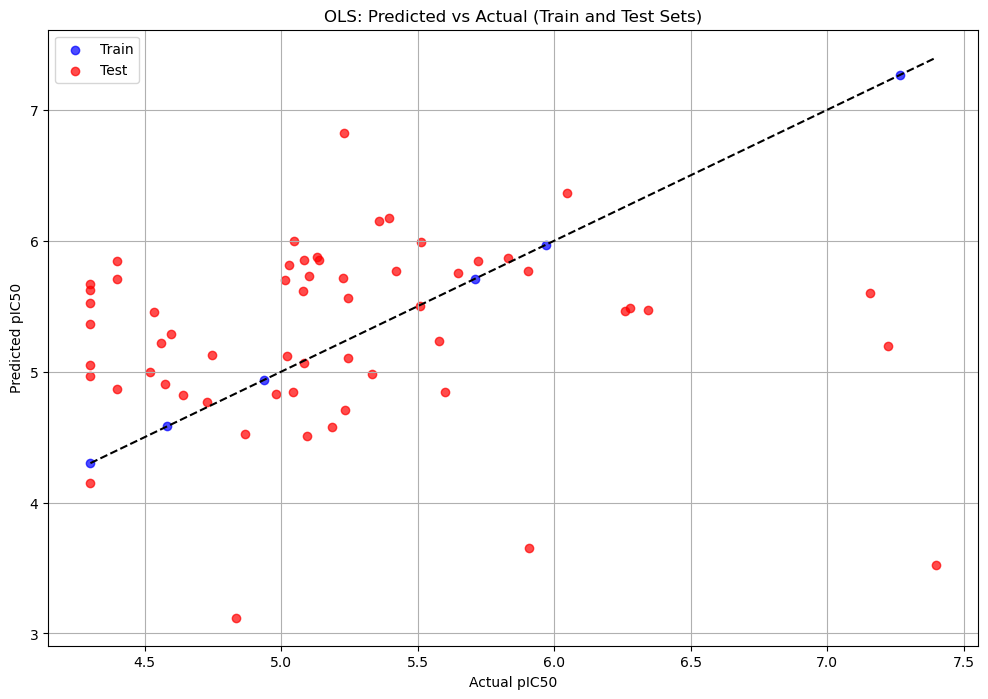

In [72]:
# Plot linear regression model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(12,8))
plt.scatter(y_train, y_train_pred, color='blue', label='Train', alpha=0.7)
plt.scatter(y_test, y_test_pred, color='red', label='Test', alpha=0.7)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], color='black', linestyle='--')
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")
plt.title("OLS: Predicted vs Actual (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

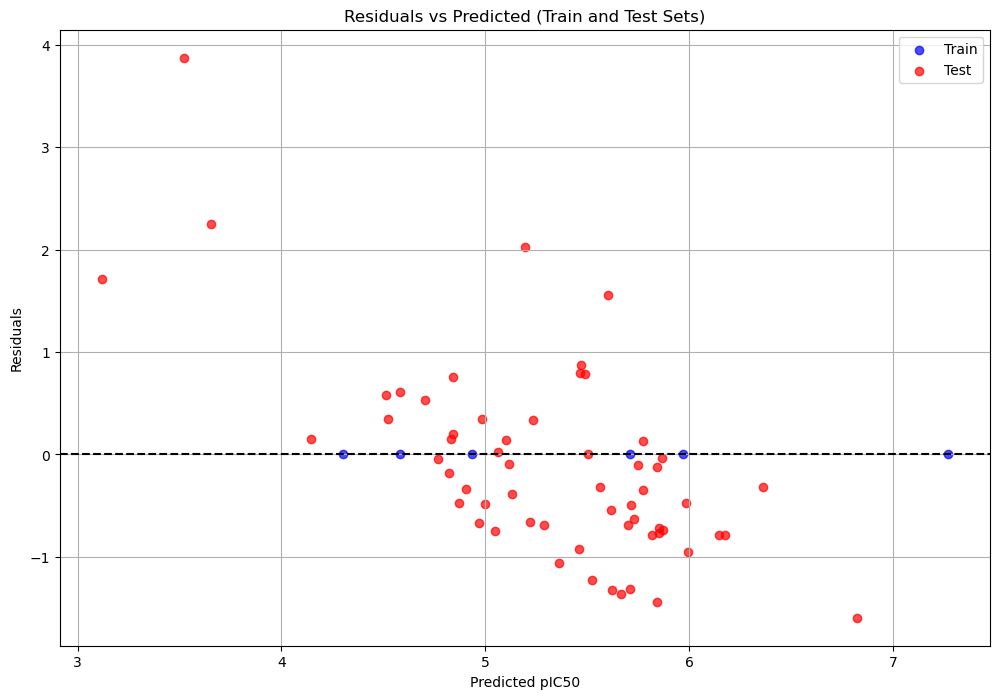

In [73]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, residuals_train, color='blue', label='Train', alpha=0.7)
plt.scatter(y_test_pred, residuals_test, color='red', label='Test', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted pIC50")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

In [75]:
# Obtain coefficients from the linear regression model
print("Intercept:", model.intercept_)
print("Coefficients:")
coefficients = pd.Series(model.coef_, index=df2.drop(columns=["pIC50"]).columns)
print(coefficients)

Intercept: 5.3185610593640265
Coefficients:
Molecular_Weight   -0.002412
Polar_Area         -0.003933
Complexity         -0.000700
heavycnt           -0.002261
hbonddonor         -0.004789
                      ...   
WTPT-5              0.000859
WPATH              -0.000530
WPOL                0.000438
XLogP               0.000820
Zagreb             -0.000635
Length: 1561, dtype: float64


## Regularization Methods

### Ridge Regression

Ridge reduced the weight/magnitude of the each independent variable on the the output, but keeps all the variables.

In [76]:
# Ridge Regression with alpha=1.0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_ridge_pred = ridge_model.predict(X_test)

print("Ridge Test MSE:", mean_squared_error(y_test, y_ridge_pred))
print("Ridge Test R²:", r2_score(y_test, y_ridge_pred))

Ridge Test MSE: 0.9489842872622235
Ridge Test R²: -0.8394510563610822


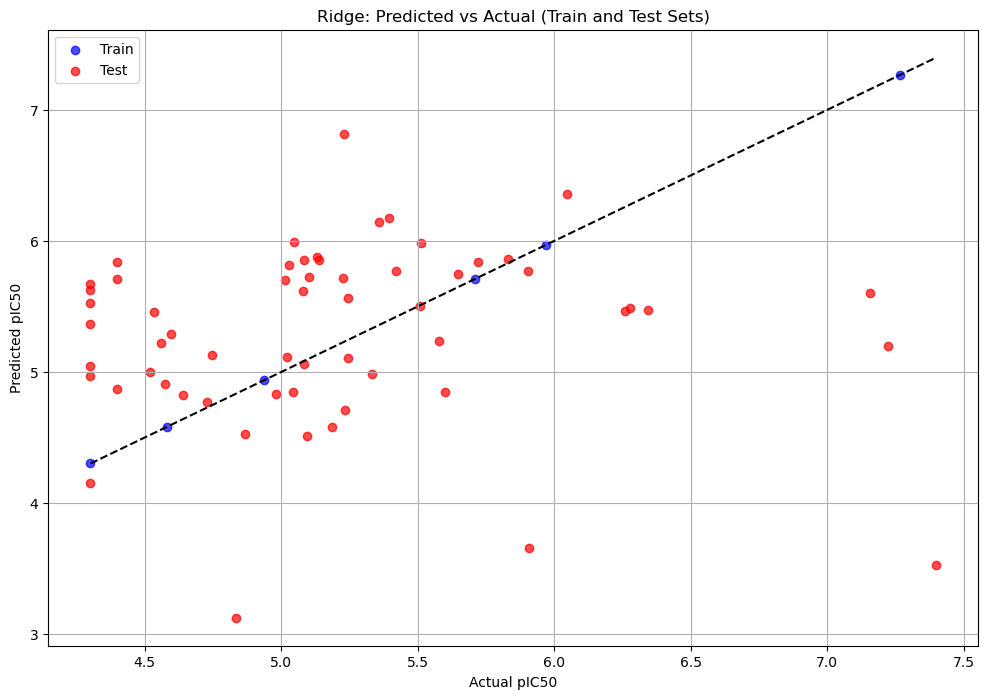

In [77]:
# Plot Ridge regression model
y_ridge_train_pred = ridge_model.predict(X_train)
y_ridge_test_pred = ridge_model.predict(X_test)

plt.figure(figsize=(12,8))
plt.scatter(y_train, y_ridge_train_pred, color='blue', label='Train', alpha=0.7)
plt.scatter(y_test, y_ridge_test_pred, color='red', label='Test', alpha=0.7)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], color='black', linestyle='--')
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")
plt.title("Ridge: Predicted vs Actual (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

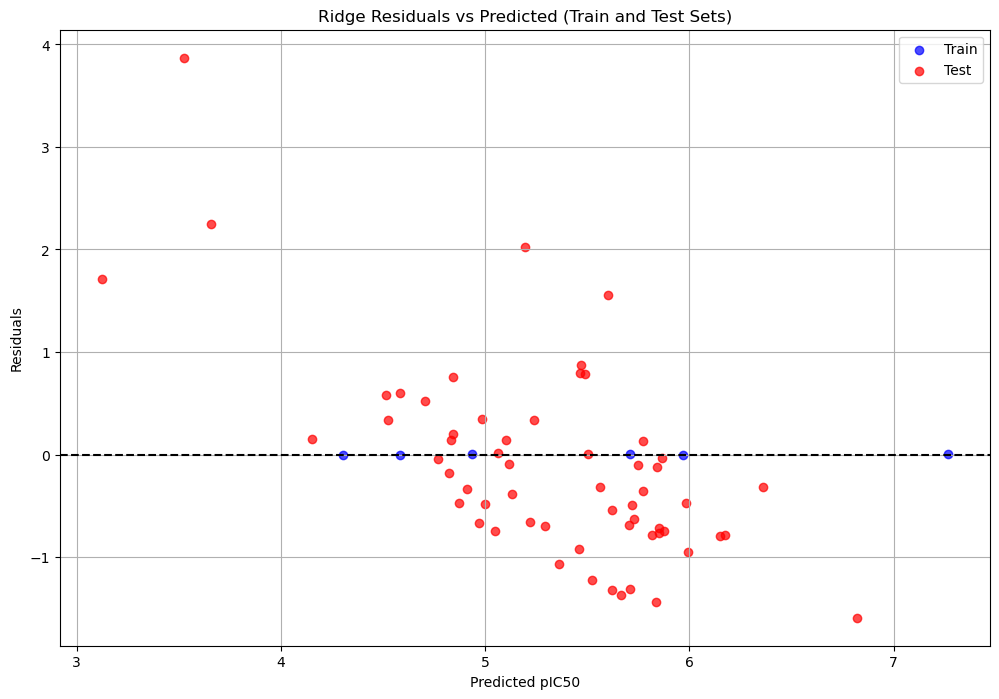

In [78]:
residuals_ridge_train = y_train - y_ridge_train_pred
residuals_ridge_test = y_test - y_ridge_test_pred

plt.figure(figsize=(12,8))
plt.scatter(y_ridge_train_pred, residuals_ridge_train, color='blue', label='Train', alpha=0.7)
plt.scatter(y_ridge_test_pred, residuals_ridge_test, color='red', label='Test', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted pIC50")
plt.ylabel("Residuals")
plt.title("Ridge Residuals vs Predicted (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

In [79]:
# Obtain coefficients from the Ridge regression model
print("Ridge Intercept:", ridge_model.intercept_)
print("Ridge Coefficients:")
ridge_coefficients = pd.Series(ridge_model.coef_, index=df2.drop(columns=["pIC50"]).columns)
print(ridge_coefficients)

Ridge Intercept: 5.319119083235295
Ridge Coefficients:
Molecular_Weight   -0.002408
Polar_Area         -0.003924
Complexity         -0.000700
heavycnt           -0.002257
hbonddonor         -0.004780
                      ...   
WTPT-5              0.000854
WPATH              -0.000529
WPOL                0.000436
XLogP               0.000821
Zagreb             -0.000633
Length: 1561, dtype: float64


In [80]:
# Tune alpha using RidgeCV (adjusted for small data)
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-3, 3, 50)  # Fewer alphas to reduce output
ridge_cv = RidgeCV(alphas=alphas, cv=3)  # 3-fold CV for small train set
ridge_cv.fit(X_train, y_train)

print("Best alpha:", ridge_cv.alpha_)
print("Best CV score (R²):", ridge_cv.best_score_)

# Predict with tuned model
y_ridge_cv_pred = ridge_cv.predict(X_test)
print("Tuned Ridge Test MSE:", mean_squared_error(y_test, y_ridge_cv_pred))
print("Tuned Ridge Test R²:", r2_score(y_test, y_ridge_cv_pred))

Best alpha: 568.9866029018293
Best CV score (R²): 0.3163662270769492
Tuned Ridge Test MSE: 0.6544332358130239
Tuned Ridge Test R²: -0.268511948081849


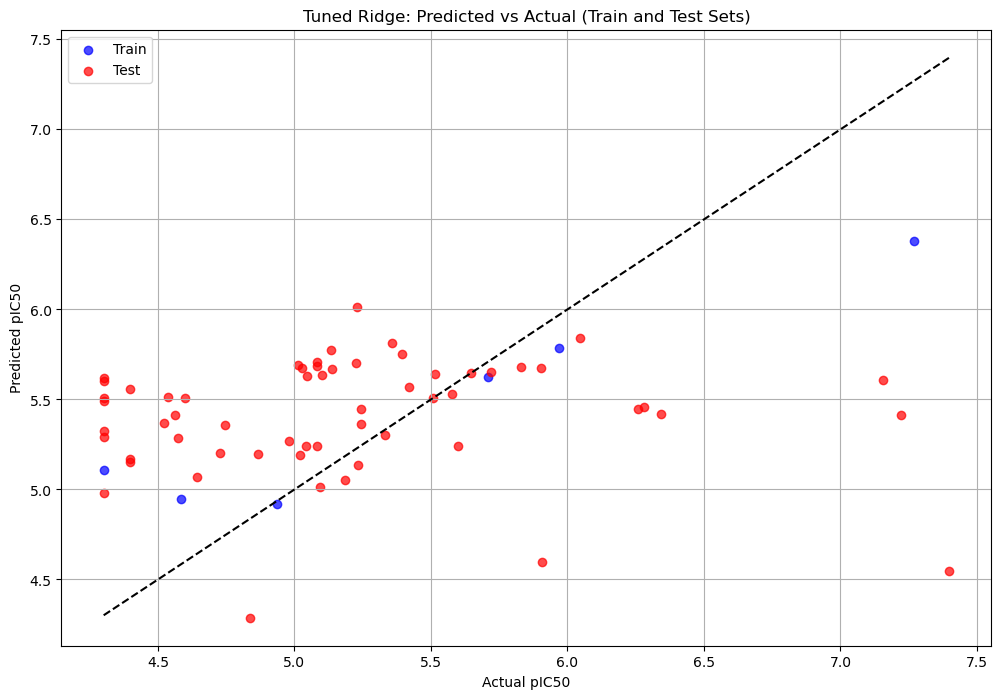

In [81]:
# Plot Tuned Ridge regression model
y_ridge_cv_train_pred = ridge_cv.predict(X_train)
y_ridge_cv_test_pred = ridge_cv.predict(X_test)

plt.figure(figsize=(12,8))
plt.scatter(y_train, y_ridge_cv_train_pred, color='blue', label='Train', alpha=0.7)
plt.scatter(y_test, y_ridge_cv_test_pred, color='red', label='Test', alpha=0.7)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], color='black', linestyle='--')
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")
plt.title("Tuned Ridge: Predicted vs Actual (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

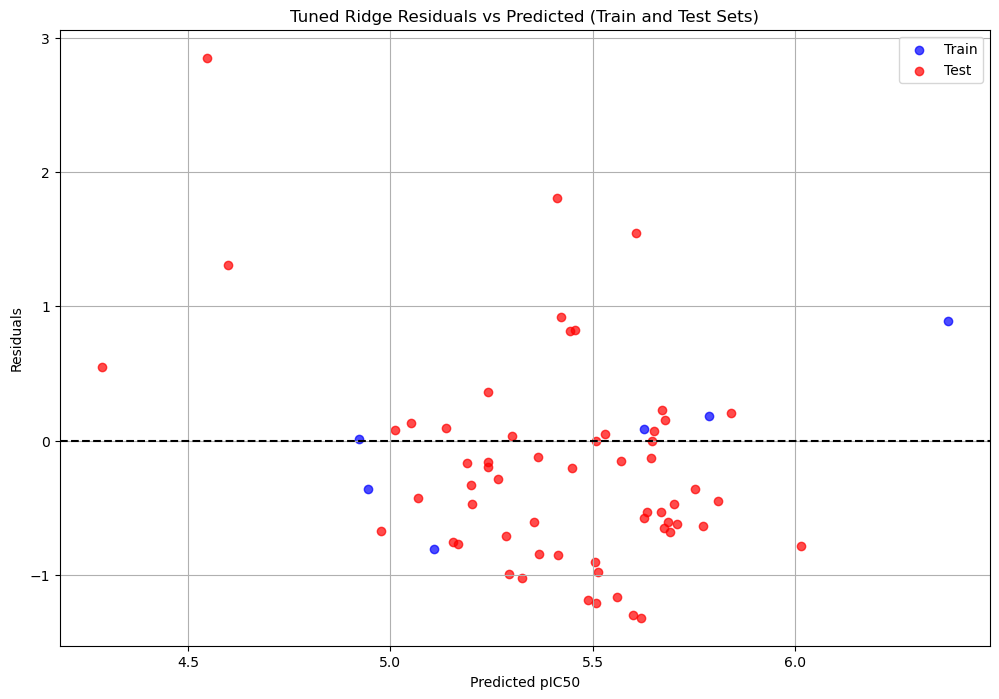

In [82]:
residuals_ridge_cv_train = y_train - y_ridge_cv_train_pred
residuals_ridge_cv_test = y_test - y_ridge_cv_test_pred

plt.figure(figsize=(12,8))
plt.scatter(y_ridge_cv_train_pred, residuals_ridge_cv_train, color='blue', label='Train', alpha=0.7)
plt.scatter(y_ridge_cv_test_pred, residuals_ridge_cv_test, color='red', label='Test', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted pIC50")
plt.ylabel("Residuals")
plt.title("Tuned Ridge Residuals vs Predicted (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

In [83]:
# Obtain coefficients from the Tuned Ridge regression model
print("Tuned Ridge Intercept:", ridge_cv.intercept_)
print("Tuned Ridge Coefficients:")
ridge_cv_coefficients = pd.Series(ridge_cv.coef_, index=df2.drop(columns=["pIC50"]).columns)
print(ridge_cv_coefficients)

Tuned Ridge Intercept: 5.417561493207888
Tuned Ridge Coefficients:
Molecular_Weight   -0.001082
Polar_Area         -0.001658
Complexity         -0.000277
heavycnt           -0.000897
hbonddonor         -0.002425
                      ...   
WTPT-5              0.000060
WPATH              -0.000245
WPOL                0.000147
XLogP               0.001080
Zagreb             -0.000226
Length: 1561, dtype: float64


### Lasso Regression

Lasso reduces the number of independent variables affecting the output

In [84]:
# Lasso Regression with alpha=0.01 (default often too high)
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

y_lasso_pred = lasso_model.predict(X_test)

print("Lasso Test MSE:", mean_squared_error(y_test, y_lasso_pred))
print("Lasso Test R²:", r2_score(y_test, y_lasso_pred))

Lasso Test MSE: 0.7170256436704917
Lasso Test R²: -0.38983710836007024


/opt/anaconda3/envs/cocci_env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.537e-03, tolerance: 5.977e-04
  model = cd_fast.enet_coordinate_descent(


In [85]:
# Tune alpha using LassoCV
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=3, random_state=42)
lasso_cv.fit(X_train, y_train)

print("Best alpha:", lasso_cv.alpha_)
print("Best CV score (R²):", lasso_cv.score(X_train, y_train))

# Predict with tuned model
y_lasso_cv_pred = lasso_cv.predict(X_test)
print("Tuned Lasso Test MSE:", mean_squared_error(y_test, y_lasso_cv_pred))
print("Tuned Lasso Test R²:", r2_score(y_test, y_lasso_cv_pred))

Best alpha: 0.9540954763499944
Best CV score (R²): 0.22551315264197624
Tuned Lasso Test MSE: 0.5181093538878448
Tuned Lasso Test R²: -0.004270366866686359


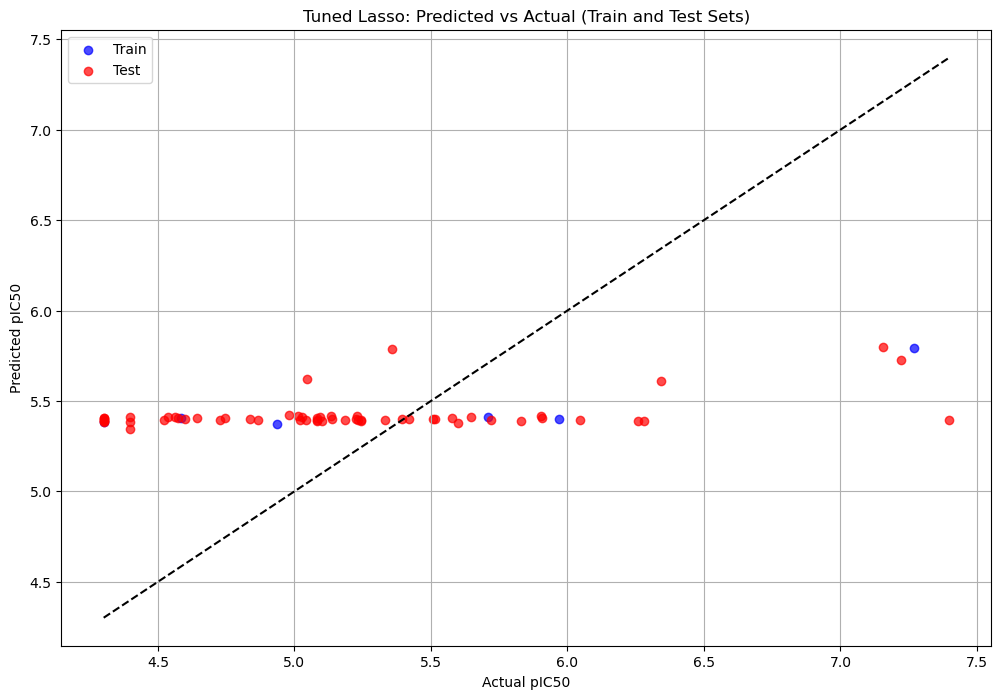

In [86]:
# Plot Tuned Lasso regression model
y_lasso_cv_train_pred = lasso_cv.predict(X_train)
y_lasso_cv_test_pred = lasso_cv.predict(X_test)

plt.figure(figsize=(12,8))
plt.scatter(y_train, y_lasso_cv_train_pred, color='blue', label='Train', alpha=0.7)
plt.scatter(y_test, y_lasso_cv_test_pred, color='red', label='Test', alpha=0.7)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], color='black', linestyle='--')
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")
plt.title("Tuned Lasso: Predicted vs Actual (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

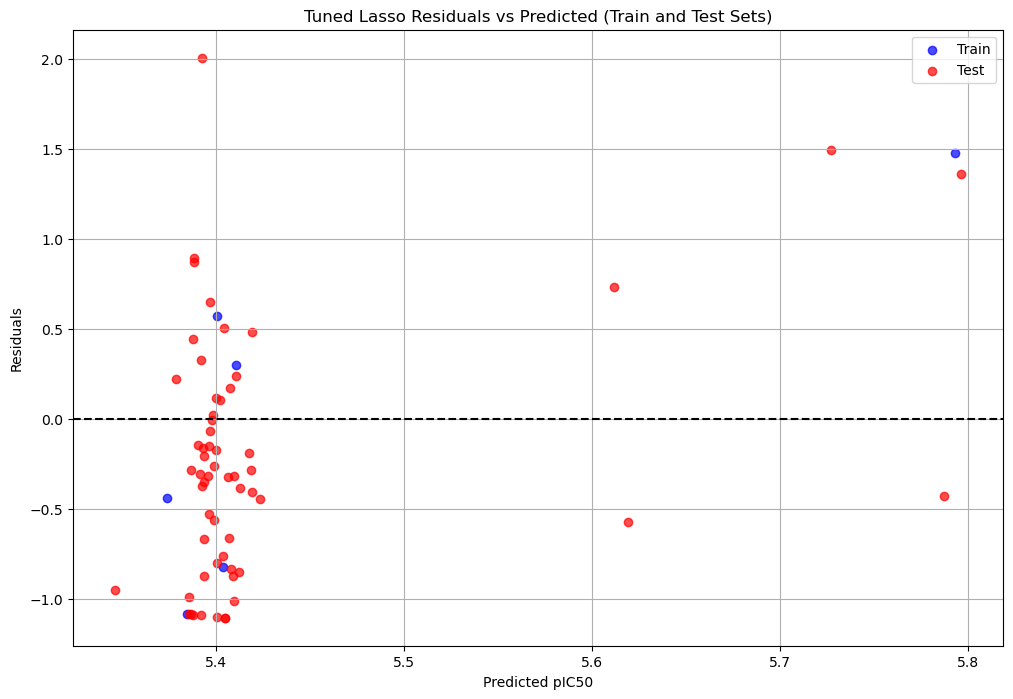

In [87]:
residuals_lasso_cv_train = y_train - y_lasso_cv_train_pred
residuals_lasso_cv_test = y_test - y_lasso_cv_test_pred

plt.figure(figsize=(12,8))
plt.scatter(y_lasso_cv_train_pred, residuals_lasso_cv_train, color='blue', label='Train', alpha=0.7)
plt.scatter(y_lasso_cv_test_pred, residuals_lasso_cv_test, color='red', label='Test', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted pIC50")
plt.ylabel("Residuals")
plt.title("Tuned Lasso Residuals vs Predicted (Train and Test Sets)")
plt.legend()
plt.grid()
plt.show()

In [91]:
# Obtain coefficients from the Tuned Lasso regression model
print("Tuned Lasso Intercept:", lasso_cv.intercept_)
print("Tuned Lasso Coefficients:")
lasso_cv_coefficients = pd.Series(lasso_cv.coef_, index=df2.drop(columns=["pIC50"]).columns)
print(lasso_cv_coefficients)
print("Number of non-zero coefficients:", (lasso_cv.coef_ != 0).sum())

""" 
Feature Selection: Lasso shrank 44 coefficients to zero, keeping only 2: BCUTp-1h and minaasN. 
"""

Tuned Lasso Intercept: 5.428202609482377
Tuned Lasso Coefficients:
Molecular_Weight   -0.0
Polar_Area         -0.0
Complexity          0.0
heavycnt           -0.0
hbonddonor         -0.0
                   ... 
WTPT-5             -0.0
WPATH              -0.0
WPOL                0.0
XLogP               0.0
Zagreb              0.0
Length: 1561, dtype: float64
Number of non-zero coefficients: 2


' \nFeature Selection: Lasso shrank 44 coefficients to zero, keeping only 2: BCUTp-1h and minaasN. \n'

In [90]:
#what are the non -zero coefficients?
lasso_cv_coefficients[lasso_cv_coefficients != 0]

BCUTp-1h    0.012678
minaasN     0.093455
dtype: float64